# basics of k-means clustering

* k-means runs mmuch faster than hierarchical clustering

1. generate cluster cetres

* `kmeans(obs, k_or_guess, iter, thresh, check_finite)`
* `obs` is standardised data (observations)
* `k_or_guess` is number of clusters
* `iter` is number of iterations (default is 20)
* `thresh` is threshold for convergence (default is 1e-05)
* `check_finite` is whether to check if observatainos contain only finite values (default is True)

Returns two objects: cluster centers and distortion (sum of squared distances of observations to their closest cluster center)


2. generate cluster labels

* `vq(obs, code_book, check_finite=True)`
* `obs` is standardised data (observations)
* `code_book` is cluster centers
* `check_finite` is whether to check if observatainos contain only finite values (default is True)

Returns two objects: cluster labels and distortion (sum of squared distances of observations to their closest cluster center)

**distortions** are used to evaluate the quality of clustering. Lower distortion means better clustering.

* `kmeans` returns a single value of distortion
* `vq` returns a list of distortions for each observation

```python
from scipy.cluster.vq import kmeans, vq
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cluster_centers, _ = kmeans(df[['scaled_x', 'scaled_y']], 3)
df['cluster_labels'], _ = vq(df[['scaled_x', 'scaled_y']], cluster_centers)

sns.scatterplot(x='scaled_x', y='scaled_y', hue='cluster_labels', data=df)
plt.show()

```


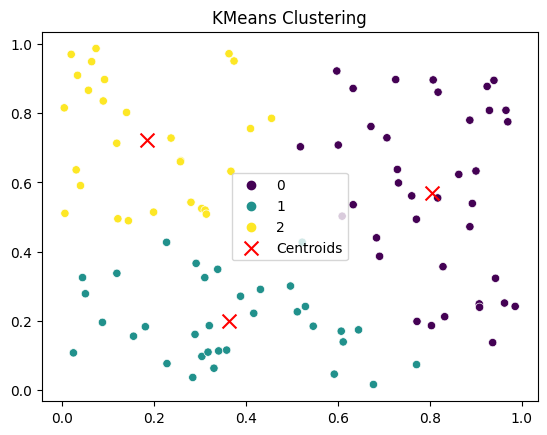

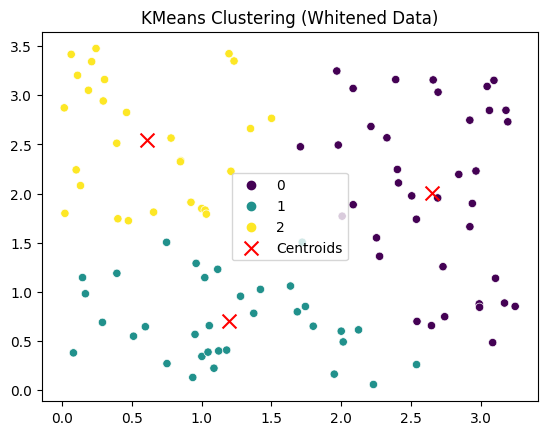

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

# Generate random data
np.random.seed(42)
data = np.random.rand(100, 2)

# Whiten the data
data_whitened = whiten(data)

# Perform k-means clustering
centroids_whitened, distortion = kmeans(data_whitened, 3)

# Assign each sample to a cluster
cluster_labels, _ = vq(data_whitened, centroids_whitened)

# Transform centroids back to original scale
centroids = centroids_whitened * data.std(axis=0)

# Plot the clusters
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=cluster_labels, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.legend()
plt.title('KMeans Clustering')
plt.show()

# Plot the clusters using the whitened data
sns.scatterplot(x=data_whitened[:, 0], y=data_whitened[:, 1], hue=cluster_labels, palette='viridis')
plt.scatter(centroids_whitened[:, 0], centroids_whitened[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.legend()
plt.title('KMeans Clustering (Whitened Data)')
plt.show()

425 ms ± 40.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


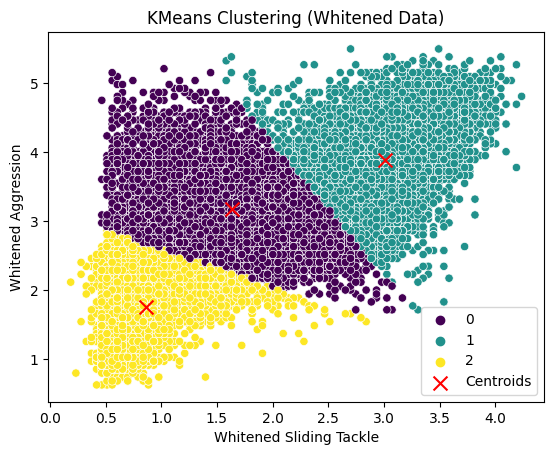

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

# Load the dataset
df = pd.read_csv('fifa_18_dataset.csv')

# Select the relevant columns
data = df[['sliding_tackle', 'aggression']].dropna()

# Whiten the data
data_whitened = whiten(data)

# Measure the time taken to perform k-means clustering
%timeit centroids_whitened, distortion = kmeans(data_whitened, 3)

# Perform k-means clustering
centroids_whitened, distortion = kmeans(data_whitened, 3)

# Assign each sample to a cluster
cluster_labels, _ = vq(data_whitened, centroids_whitened)



# Plot the clusters using the whitened data
sns.scatterplot(x=data_whitened[:, 0], y=data_whitened[:, 1], hue=cluster_labels, palette='viridis')
plt.scatter(centroids_whitened[:, 0], centroids_whitened[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.legend()
plt.title('KMeans Clustering (Whitened Data)')
plt.xlabel('Whitened Sliding Tackle')
plt.ylabel('Whitened Aggression')
plt.show()

## the right k

* elbow method
* distortion is sum of squared distances of observations to their closest cluster center
* distortion decreases as k increases
* becomes zero when k is equal to number of observations
* elbow method is used to find the optimal k
* elbow is the point where distortion starts to decrease in a linear fashion
* elbow is the optimal k

```python
from scipy.cluster.vq import kmeans, vq
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

distortions = []
for k in range(1, 11):
    cluster_centers, distortion = kmeans(df[['scaled_x', 'scaled_y']], k)
    distortions.append(distortion)

sns.lineplot(x=range(1, 11), y=distortions)
plt.xlabel('k')
plt.ylabel('distortion')
plt.show()
```


```python

distortions = []
num_clusters = range(1, 11)

for k in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_x', 'scaled_y']], k)
    distortions.append(distortion)

elbow = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow)
plt.show()
```

* elbow only gives indication
* does not always pinpoint the exact k
* other methods like average silhouette and gap statistic can be used to find the optimal k

### elbow method

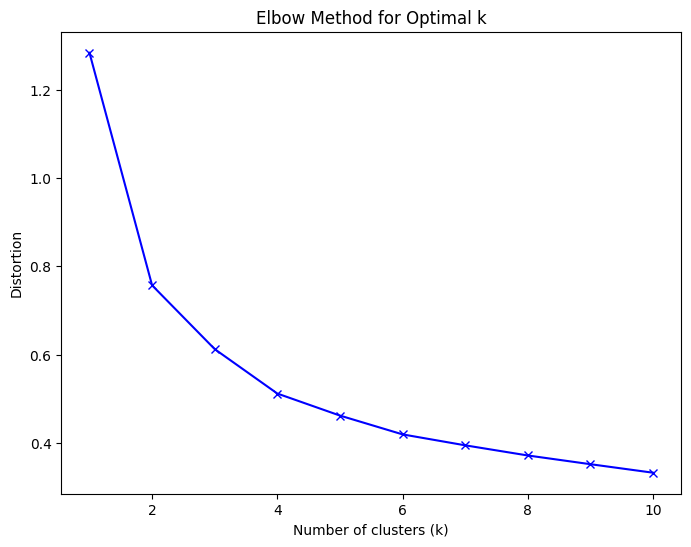

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, whiten

# Load the dataset
df = pd.read_csv('fifa_18_dataset.csv')

# Select the relevant columns
data = df[['sliding_tackle', 'aggression']].dropna()

# Whiten the data
data_whitened = whiten(data)

# Elbow Method
distortions = []
K = range(1, 11)
for k in K:
    centroids, distortion = kmeans(data_whitened, k)
    distortions.append(distortion)

# Plot the elbow
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

### Average silhouette method



The Silhouette Method is a technique used to determine the optimal number of clusters in a dataset. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where:

- A score close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- A score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
- A score close to -1 indicates that the object might have been assigned to the wrong cluster.

### How to Calculate the Silhouette Score

For each data point:
1. **Calculate the average distance to all other points in the same cluster (a)**: This is the mean intra-cluster distance.
2. **Calculate the average distance to all points in the nearest cluster (b)**: This is the mean nearest-cluster distance.
3. **Calculate the silhouette score for the data point**: \( \text{silhouette score} = \frac{b - a}{\max(a, b)} \)

### Interpreting the Silhouette Plot

When you plot the average silhouette scores for different values of `k` (number of clusters), you can interpret the plot as follows:

- **High Average Silhouette Score**: Indicates that the clusters are well separated and the data points are well matched to their own clusters. The optimal number of clusters is typically where the silhouette score is highest.
- **Low or Negative Average Silhouette Score**: Indicates that the clusters are not well separated, and some data points might be assigned to the wrong clusters.

### Example Code to Plot Silhouette Scores

Here is an example code snippet to calculate and plot the silhouette scores for different values of `k`:



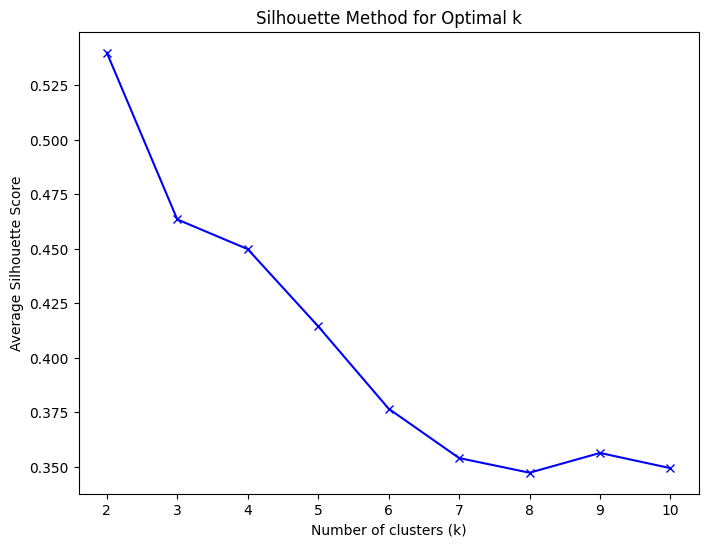

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('fifa_18_dataset.csv')

# Select the relevant columns
data = df[['sliding_tackle', 'aggression']].dropna()

# Whiten the data
data_whitened = whiten(data)

# Average Silhouette Method
silhouette_scores = []
K = range(2, 11)
for k in K:
    centroids, _ = kmeans(data_whitened, k)
    cluster_labels, _ = vq(data_whitened, centroids)
    silhouette_scores.append(silhouette_score(data_whitened, cluster_labels))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()



### Interpreting the Plot

1. **Look for the Peak**: The optimal number of clusters is typically where the silhouette score is highest. This indicates that the clusters are well separated and the data points are well matched to their own clusters.
2. **Check for Consistency**: Ensure that the silhouette score does not drop significantly for the chosen `k`. A significant drop might indicate that the chosen number of clusters is not stable.

By using the silhouette method, you can make an informed decision about the optimal number of clusters for your dataset, ensuring that the clusters are well-defined and meaningful.

### gap statistic method

In [8]:
%pip install gap-stat

^C
Note: you may need to restart the kernel to use updated packages.


C:\Users\zoona\AppData\Local\Temp\ipykernel_30016\2125988006.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'cluster_count':k, 'gap_value':gap}, ignore_index=True)
C:\Users\zoona\AppData\Local\Temp\ipykernel_30016\2125988006.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'cluster_count':k, 'gap_value':gap}, ignore_index=True)
C:\Users\zoona\AppData\Local\Temp\ipykernel_30016\2125988006.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'cluster_count':k, 'gap_value':gap}, ignore_index=True)
C:\Users\zoona\AppData\Local\Temp\ipykernel_30016\2125988006.py:45: FutureWarning: The frame.append method is deprecated and wi

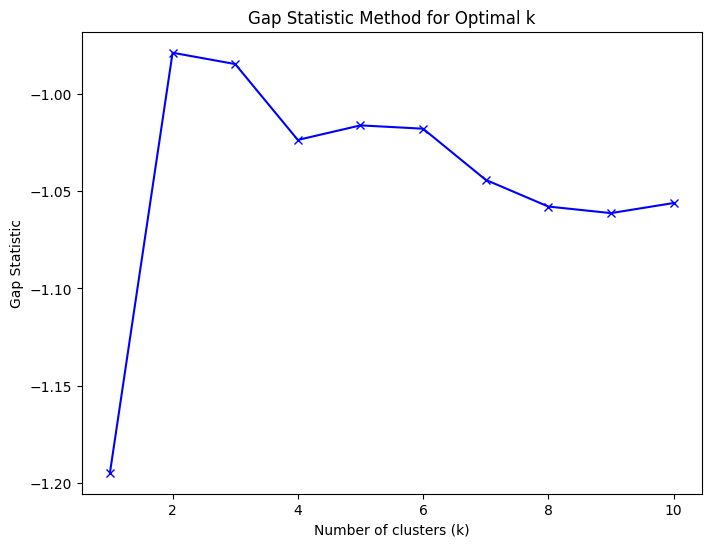

Optimal number of clusters: 2


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

def gap_statistic(data, n_refs=20, max_clusters=10):
    """
    Compute the Gap Statistic for an optimal number of clusters.
    
    Parameters:
    data (ndarray): The data to cluster.
    n_refs (int): Number of reference datasets to generate.
    max_clusters (int): Maximum number of clusters to test.
    
    Returns:
    gaps (list): Gap values for each number of clusters.
    optimal_k (int): The optimal number of clusters.
    """
    gaps = np.zeros(max_clusters)
    results_df = pd.DataFrame({'cluster_count':[], 'gap_value':[]})
    
    for k in range(1, max_clusters + 1):
        # Fit the k-means model
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)
        cluster_labels = kmeans.labels_
        
        # Calculate the dispersion for the real data
        Wk = np.sum([np.mean(pairwise_distances(data[cluster_labels == j])) for j in range(k)])
        
        # Create reference datasets and calculate dispersion for them
        Wk_refs = np.zeros(n_refs)
        for i in range(n_refs):
            random_reference = np.random.random_sample(size=data.shape)
            kmeans.fit(random_reference)
            ref_labels = kmeans.labels_
            Wk_refs[i] = np.sum([np.mean(pairwise_distances(random_reference[ref_labels == j])) for j in range(k)])
        
        # Calculate the gap statistic
        gap = np.log(np.mean(Wk_refs)) - np.log(Wk)
        gaps[k-1] = gap
        
        results_df = pd.concat([results_df, pd.DataFrame([{'cluster_count': k, 'gap_value': gap}])], ignore_index=True)
    
    optimal_k = gaps.argmax() + 1
    return gaps, optimal_k

# Load the dataset
df = pd.read_csv('fifa_18_dataset.csv')

# Select the relevant columns
data = df[['sliding_tackle', 'aggression']].dropna().values

# Whiten the data
data_whitened = whiten(data)

# Calculate the Gap Statistic
gaps, optimal_k = gap_statistic(data_whitened, n_refs=20, max_clusters=10)

# Plot the Gap Statistic
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), gaps, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic Method for Optimal k')
plt.show()

print('Optimal number of clusters:', optimal_k)

The Gap Statistic is a method for determining the optimal number of clusters in a dataset. It compares the total within-cluster variation for different numbers of clusters with their expected values under null reference distributions of the data. The idea is to choose the number of clusters that maximizes the gap between the observed within-cluster dispersion and that expected under a null reference distribution.

### Steps to Compute the Gap Statistic

1. **Compute Within-Cluster Dispersion for Actual Data**:
   - For each number of clusters \( k \), run the k-means algorithm on the actual data and compute the within-cluster dispersion \( W_k \).
   - The within-cluster dispersion \( W_k \) is typically the sum of squared distances from each point to its assigned cluster centroid.

2. **Generate Reference Datasets**:
   - Generate multiple (e.g., 20) reference datasets by sampling uniformly from the data's bounding box.
   - For each reference dataset, run the k-means algorithm for each \( k \) and compute the within-cluster dispersion \( W_k^{*} \).

3. **Compute the Gap Statistic**:
   - For each \( k \), compute the average within-cluster dispersion for the reference datasets \( \bar{W_k^{*}} \).
   - The gap statistic for \( k \) is defined as:
     \[
     \text{Gap}(k) = \frac{1}{n_{\text{refs}}} \sum_{i=1}^{n_{\text{refs}}} \log(W_k^{*i}) - \log(W_k)
     \]
   - Here, \( n_{\text{refs}} \) is the number of reference datasets, \( W_k^{*i} \) is the within-cluster dispersion for the \( i \)-th reference dataset, and \( W_k \) is the within-cluster dispersion for the actual data.

4. **Determine the Optimal Number of Clusters**:
   - The optimal number of clusters \( k \) is the value that maximizes the gap statistic.
   - Additionally, you can use the "one standard error" rule, which selects the smallest \( k \) such that:
     \[
     \text{Gap}(k) \geq \text{Gap}(k+1) - s_{k+1}
     \]
   - Here, \( s_{k+1} \) is the standard error of the gap statistic for \( k+1 \).

### Interpreting the Results

- **Gap Statistic Plot**: Plot the gap statistic values against the number of clusters \( k \). The optimal number of clusters is typically where the gap statistic is highest.
- **Maximizing Gap**: The value of \( k \) that maximizes the gap statistic indicates the optimal number of clusters. This is because it represents the point where the within-cluster dispersion for the actual data is significantly lower than that for the reference datasets.
- **One Standard Error Rule**: This rule helps to avoid overfitting by selecting a simpler model (fewer clusters) that is within one standard error of the maximum gap statistic.

### Example Code to Compute and Plot the Gap Statistic

Here is an example code snippet to compute and plot the gap statistic:





### Summary

- **Gap Statistic**: Measures the difference between the within-cluster dispersion for the actual data and that for reference datasets.
- **Optimal k**: The number of clusters that maximizes the gap statistic.
- **Interpretation**: A higher gap statistic indicates that the clustering structure is more pronounced compared to random uniform data, suggesting a better clustering solution.

## limitations of k-means clustering

K-means clustering has several limitations, especially when it comes to the choice of initial seeds (centroids):

1. **Sensitivity to Initial Seeds**:
   - The final clusters can vary significantly based on the initial placement of centroids. Poor initialization can lead to suboptimal clustering results.
   - Different runs with different seeds can produce different results, making the algorithm non-deterministic.

2. **Local Minima**:
   - K-means can get stuck in local minima, meaning it might not find the global optimal solution. This is often due to poor initial seed placement.

3. **Number of Clusters (k)**:
   - The number of clusters \( k \) must be specified in advance, which is not always straightforward and can lead to either overfitting or underfitting.

4. **Assumption of Spherical Clusters**:
   - K-means assumes that clusters are spherical and equally sized, which may not be the case in real-world data.

5. **Scalability**:
   - While K-means is relatively efficient, it can become computationally expensive with large datasets, especially if many iterations are required to converge.

6. **Sensitivity to Outliers**:
   - K-means is sensitive to outliers, which can distort the cluster centroids and lead to poor clustering results.

7. **Non-Convex Shapes**:
   - K-means struggles with clusters that are not convex or have complex shapes, as it tends to partition the space into Voronoi cells.

To mitigate some of these limitations, techniques such as K-means++ for better initialization, using multiple runs with different seeds, or alternative clustering algorithms like DBSCAN or hierarchical clustering can be considered.

## uniform cluster bias



K-means clustering tends to form clusters of roughly equal size due to its algorithmic nature and the way it minimizes the within-cluster variance. Here are the key reasons for this bias:

1. **Objective Function**:
   - K-means minimizes the sum of squared distances between data points and their assigned cluster centroids. This objective function inherently favors clusters that are compact and of similar size, as it aims to reduce the overall variance within each cluster.

2. **Voronoi Tessellation**:
   - The algorithm partitions the data space into Voronoi cells, where each cell corresponds to the region closest to a particular centroid. This partitioning tends to create clusters that are spherical and of similar size, especially in higher dimensions.

3. **Centroid Update Step**:
   - During each iteration, centroids are updated to be the mean of the points assigned to them. This averaging process pulls centroids towards the center of their assigned points, leading to more uniform cluster sizes over iterations.

4. **Equal Influence of Points**:
   - Each data point has an equal influence on the centroid calculation. This equal weighting can lead to clusters that balance the number of points, especially when the data is uniformly distributed.

5. **Sensitivity to Initial Seeds**:
   - Poor initialization can lead to imbalanced clusters, but with good initialization methods like K-means++, the algorithm tends to find more balanced clusters. However, even with good initialization, the tendency towards uniform cluster sizes remains due to the reasons mentioned above.

These factors collectively cause K-means to favor clusters that are roughly equal in size and shape, which can be a limitation when dealing with data that has clusters of varying densities or non-spherical shapes.

## seeds

The seed in K-means clustering affects the initial placement of the centroids, which can significantly influence the final clustering results. Here's how:

1. **Initial Centroid Placement**:
   - K-means starts by randomly selecting initial centroids. The seed determines the random number generation, thus affecting which data points are chosen as initial centroids.
   - Different initial centroids can lead to different clustering results because the algorithm may converge to different local minima.

2. **Convergence to Local Minima**:
   - K-means minimizes the within-cluster variance, but it can get stuck in local minima. The initial placement of centroids (determined by the seed) can lead the algorithm to different local minima, resulting in different final clusters.

3. **Cluster Quality**:
   - Poor initial centroids can lead to suboptimal clustering with higher within-cluster variance. Good initial centroids can lead to better clustering with lower within-cluster variance.
   - Using different seeds can produce clusters of varying quality, which is why it's common to run K-means multiple times with different seeds and choose the best result.

4. **Reproducibility**:
   - Setting a specific seed ensures that the results are reproducible. Without a fixed seed, each run of K-means can produce different results due to the random initialization of centroids.

To illustrate the effect of different seeds, let's perform K-means clustering on the mouse dataset with different seeds and compare the results:

